<a href="https://colab.research.google.com/github/mattbarrett98/mikit-learn/blob/main/mikitVscikit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Connect to mklearn.ipynb

In [ ]:
from google.colab import drive
drive.mount("mnt")
%cd "mnt/My Drive/Colab Notebooks"
!pip install import-ipynb
import import_ipynb

Mounted at mnt
/content/mnt/My Drive/Colab Notebooks
  Created wheel for import-ipynb: filename=import_ipynb-0.1.3-py3-none-any.whl size=2975 sha256=955bad292da9117606b9510c8ec1a49b6592af380f8db256213195426d11edba
  Stored in directory: /root/.cache/pip/wheels/b1/5e/dc/79780689896a056199b0b9f24471e3ee184fbd816df355d5f0
Successfully built import-ipynb


In [ ]:
import warnings
warnings.filterwarnings("ignore")

# mikit and scikit imports

In [ ]:
from mklearn import Preprocessing
from mklearn import MiKNeighboursClassifier
from mklearn import MiLogisticClassifier
from mklearn import MiSupportVectorClassifier
from mklearn import MiDecisionTreeClassifier
from mklearn import MiRandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

importing Jupyter notebook from mklearn.ipynb


# Plots

11501568/11490434 [==============================] - 0s 0us/step


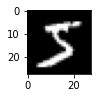

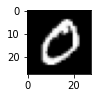

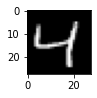

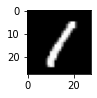

In [ ]:
#load data and plot first 4 images
from keras.datasets import mnist
from matplotlib import pyplot
(train_x, train_y), (test_x, test_y) = mnist.load_data()
train_x, test_x = train_x.astype(int), test_x.astype(int)
for i in range(4):  
  pyplot.subplot(330 + 1 + i)
  pyplot.imshow(train_x[i], cmap=pyplot.get_cmap('gray'))
  pyplot.show()

# Preprocessing

In [ ]:
# Here we have all the possible data formats required by our algorithms
train_x, test_x = Preprocessing.flatten_image(train_x, test_x)
train_x_norm, test_x_norm = Preprocessing.normalise_data(train_x, test_x)
train_y_one_hot = Preprocessing.one_hot_encode(train_y)
train_y_svm = Preprocessing.get_svc_output(train_y)

## mikit vs scikit implementations. They are considered equal if their classification accuracies are within 0.5% of each other.

# K nearest neighbours

In [ ]:
sk_knn = KNeighborsClassifier(n_neighbors=5)
sk_knn.fit(train_x_norm, train_y)
sk_knn_predictions = sk_knn.predict(test_x_norm)
sk_knn.accuracy = 100*sum(sk_knn_predictions == test_y) / test_y.shape[0]
print('{}%'.format(sk_knn.accuracy)) 

96.88%


In [ ]:
k, n_splits = 5, 4
mi_knn = MiKNeighboursClassifier(k, n_splits)
mi_knn.fit(train_x_norm, train_y)
mi_knn_predictions = mi_knn.predict(test_x_norm)
mi_knn.evaluate_predictions(mi_knn_predictions, test_y)
print('{}%.'.format(mi_knn.accuracy), mi_knn == sk_knn)

96.88%. True, mklearn's accuracy is the same as sklearn's.


# Multinomial logistic regression

In [ ]:
sk_logistic = LogisticRegression(multi_class='multinomial', solver='lbfgs')
sk_logistic.fit(train_x_norm, train_y)
sk_logistic_predictions = sk_logistic.predict(test_x_norm)
sk_logistic.accuracy = 100*sum(sk_logistic_predictions == test_y)/test_y.shape[0]
print('{}%'.format(sk_logistic.accuracy))

92.58%


In [ ]:
mi_logistic = MiLogisticClassifier()
mi_logistic.fit(train_x_norm, train_y_one_hot)
mi_logistic_predictions = mi_logistic.predict(test_x_norm)
mi_logistic.evaluate_predictions(mi_logistic_predictions, test_y)
print('{}%.'.format(mi_logistic.accuracy), mi_logistic == sk_logistic)

92.56%. True, mklearn's accuracy is just 0.02% lower than sklearn's.


# Support vector classifier

In [ ]:
# SVCs don't scale too well with more training data so we use only 10000 points
n = 10000
sk_svc = SVC().fit(train_x_norm[0:n], train_y[0:n])
sk_svc_predictions = sk_svc.predict(test_x_norm)
sk_svc.accuracy = 100*sum(sk_svc_predictions == test_y) / test_y.shape[0]
print('{}%'.format(sk_svc.accuracy))

95.94%


In [ ]:
C, epsilon, tol, max_iter = 1.0, 2.5e-3, 1e-3, 300
mi_svc = MiSupportVectorClassifier(C, epsilon, tol, max_iter)
mi_svc.fit(train_x_norm[0:n], train_y_svm[:, 0:n])
mi_svc_predictions = mi_svc.predict(test_x_norm)
mi_svc.evaluate_predictions(mi_svc_predictions, test_y)
print('{}%.'.format(mi_svc.accuracy), mi_svc == sk_svc)

95.55%. True, mklearn's accuracy is just 0.39% lower than sklearn's.


# Decision tree

In [ ]:
n = 10000
sk_tree = DecisionTreeClassifier(max_depth=20)
sk_tree.fit(train_x_norm[0:n], train_y[0:n])
sk_tree_predictions = sk_tree.predict(test_x_norm)
sk_tree.accuracy = 100*sum(sk_tree_predictions == test_y) / test_y.shape[0]
print('{}%'.format(sk_tree.accuracy))

80.68%


In [ ]:
max_depth, min_samples_split, min_gini = 20, 2, 1e-5
mi_tree = MiDecisionTreeClassifier(max_depth, min_samples_split, min_gini)
mi_tree.fit(train_x_norm[0:n], train_y_one_hot[0:n])
mi_tree_predictions = mi_tree.predict(test_x_norm)
mi_tree.evaluate_predictions(mi_tree_predictions, test_y)
print('{}%.'.format(mi_tree.accuracy), mi_tree == sk_tree)

80.91%. True, mklearn's accuracy is just 0.23% higher than sklearn's.


# Random forest

In [ ]:
n = 10000
sk_forest = RandomForestClassifier(max_features=100, max_depth=20)
sk_forest.fit(train_x[0:n], train_y[0:n])
sk_forest_predictions = sk_forest.predict(test_x)
sk_forest.accuracy = 100*sum(sk_forest_predictions == test_y) / test_y.shape[0]
print('{}%'.format(sk_forest.accuracy))

94.51%


In [ ]:
n_trees, max_features, max_depth = 100, 100, 20 
min_samples_split, min_gini, n_jobs = 2, 1e-5, 2
mi_forest = MiRandomForestClassifier(n_trees, max_features, max_depth,
                                     min_samples_split, min_gini, n_jobs)
mi_forest.fit(train_x[0:n], train_y_one_hot[0:n])
mi_forest_predictions = mi_forest.predict(test_x)
mi_forest.evaluate_predictions(mi_forest_predictions, test_y)
print('{}%.'.format(mi_forest.accuracy), mi_forest == sk_forest)

94.13%. True, mklearn's accuracy is just 0.38% lower than sklearn's.
